In [207]:
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix

In [184]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1.8) # font size 

%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [185]:
train_df = pd.read_csv('train.csv')

In [186]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
pd.crosstab(train_df['Pclass'], train_df['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Survival rate by gender')

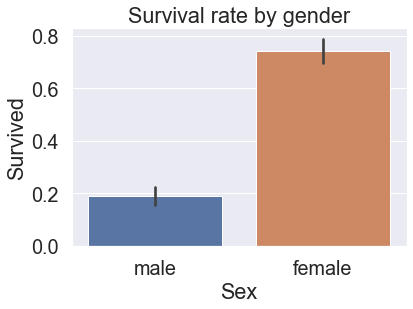

In [188]:

sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival rate by gender')

<AxesSubplot:xlabel='Age', ylabel='Survived'>

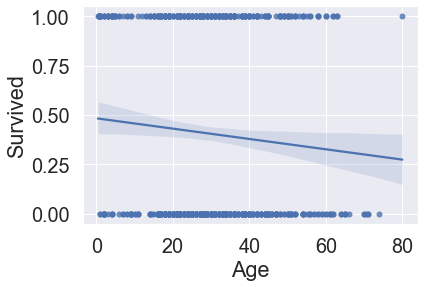

In [189]:
sns.regplot(x='Age',y='Survived',data=train_df)

Text(0.5, 1.0, 'Embarked vs survived')

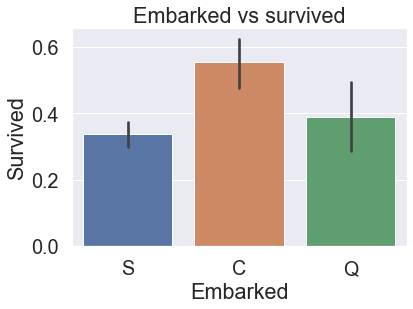

In [190]:
sns.barplot(x='Embarked',y='Survived',data=train_df)
plt.title("Embarked vs survived")

Text(0.5, 1.0, 'Embarked vs survived')

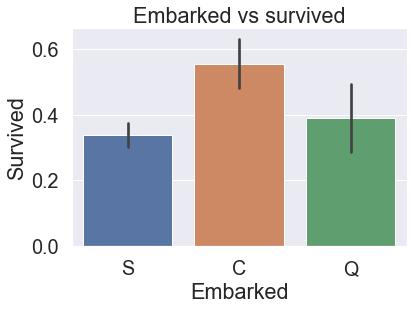

In [192]:
sns.barplot(x='Embarked',y='Survived',data=train_df)
plt.title("Embarked vs survived")

In [193]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Survived'].fillna(train_df['Survived'].median(), inplace=True)

In [194]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})
train_df['Embarked'] = train_df['Embarked'].map({'S':0,'C':1, 'Q':2,})

In [195]:
train_df['Embarked'].fillna(train_df['Embarked'].mean(),inplace=True)

In [196]:
X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3)

In [197]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [198]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [199]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=3)

In [200]:
y_pred = clf.predict(X_val)

In [201]:
accuracy = accuracy_score(y_val,y_pred)
print(accuracy)

0.7932960893854749


In [205]:
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns, 
                           class_names=['Died', 'Survived'],
                           filled=True, rounded=True, 
                           special_characters=True)



(process:11524): GLib-GIO-WARNING **: 13:25:02.720: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.4.8.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


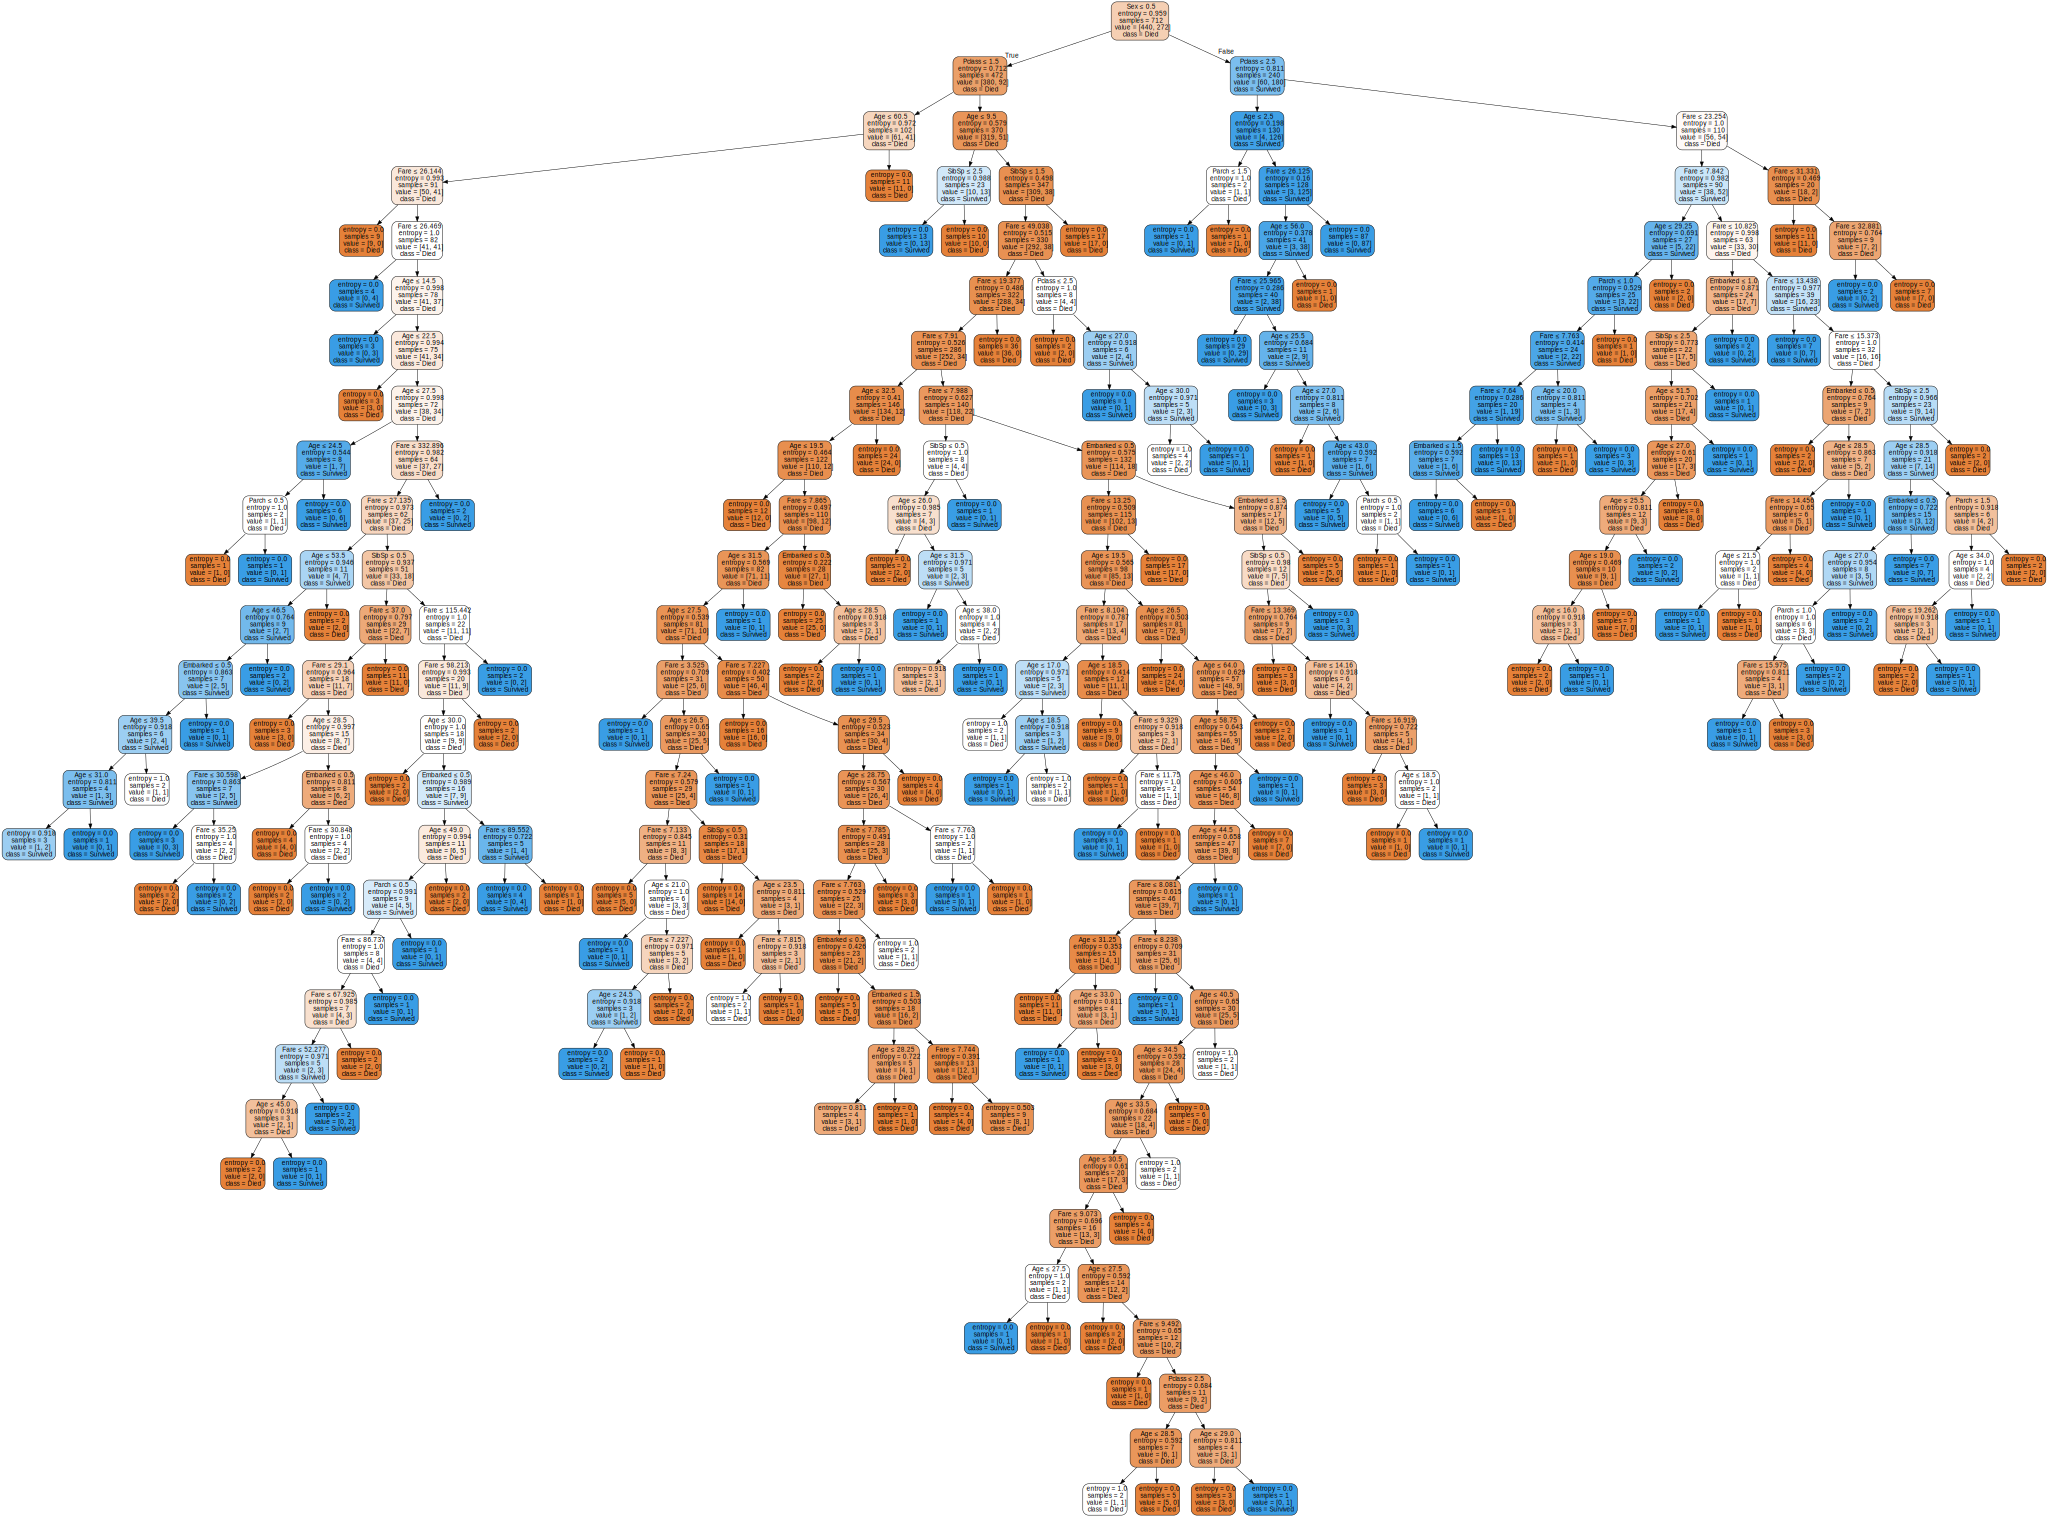

In [206]:
graph = graphviz.Source(dot_data)
graph.render('titanic_decision_tree', format='png')
graph

In [208]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
print('Confusion matrix:')
print('True Negatives: {}'.format(tn))
print('False Positives: {}'.format(fp))
print('False Negatives: {}'.format(fn))
print('True Positives: {}'.format(tp))

ValueError: Found input variables with inconsistent numbers of samples: [891, 179]

In [120]:
test_df = pd.read_csv('test.csv')

In [121]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [123]:
X_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_pred = clf.predict(X_test)
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred})
submission_df.to_csv('submission.csv', index=False)

In [124]:
result = pd.read_csv('submission.csv')

In [125]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [135]:
print('Number of people survived:',sum(result['Survived']==0))

Number of people survived: 234


In [134]:
print('Number of people not survived:',sum(result['Survived']==1))

Number of people not survived: 184


In [168]:
new_passenger = {'Pclass':1, 'Sex':'female', 'Age':25, 'SibSp':1, 'Parch':1, 'Fare':7.32, 'Embarked':'S'}


new_df = pd.DataFrame([new_passenger])
new_df['Sex'] = new_df['Sex'].map({'male': 0, 'female': 1})
new_df['Embarked'] = new_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
new_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,25,1,1,7.32,0


In [169]:
prediction = clf.predict(new_df)

In [170]:
if prediction[0] == 1:
    print('The new passenger is predicted to have survived.')
else:
    print('The new passenger is predicted to have died.')

The new passenger is predicted to have survived.


In [177]:
#using list
new_passenger_2= [[1,'female',25,1,1,7.32,'C'], [1,'female',5,1,1,7.32,'Q'], [3,'male',100,1,0,6.32,'C']]

dff = pd.DataFrame(new_passenger_2, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
dff['Sex'] = dff['Sex'].map({'male': 0, 'female': 1})
dff['Embarked'] = dff['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
dff.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,25,1,1,7.32,1
1,1,1,5,1,1,7.32,2
2,3,0,100,1,0,6.32,1


In [178]:
prediction1 = clf.predict(dff)
if prediction1[1] == 1:
    print('The new passenger is predicted to have survived.')
else:
    print('The new passenger is predicted to have died.')

The new passenger is predicted to have survived.
